# Elastic field around a Griffith crack - 2D Piece-wise linear element

Plane Elastic problem

Displacements and stresses around a straight crack  $ x_1 \in [-a,a] $ under pure tensile loading $\sigma$.

We test the computation of the displacement and stress at observation points by setting the solution of the collocation BEM to the analytical solution on the BE mesh.

The crack displacement discontinuity is given by for $ x_1 \in [-a,a] $:

$\Delta u_1 (x_1,x_2=0)= u_1 (x_1,x_2=0^+)-u_1 (x_1,x_2=0^-)=0 $ 

$\Delta u_2 (x_1,x_2=0)= u_2 (x_1,x_2=0^+)-u_2 (x_1,x_2=0^-)= \frac{4 \sigma}{E^\prime} \sqrt{a^2-x_1^2} =\frac{2 (1-\nu) \sigma}{G} \sqrt{a^2-x_1^2}  $ 

where $E^\prime = E / (1-\nu^2) $ is the plane strain Young's modulus, $G = E/ (2(1+\nu)) $ the shear modulus, $E$ the Young's modulus and $\nu$ the Poisson's ratio.


In [7]:
import sys,os,time
import matplotlib.pyplot as plt

home = os.environ["HOME"]
print('getcwd:      ', os.getcwd())

# load the analytical solution 
sys.path.append(os.path.join(os.getcwd(), '../..'))
from solutions.griffith_crack import displacement_griffith,stress_griffith,width_griffith


getcwd:       /Users/bricelecampion/ClionProjects/BigWham-Tutorials/examples/2d


In [8]:
# %% importing BigWham 
import numpy as np

home = os.environ["HOME"]
sys.path.append("/Users/bricelecampion/ClionProjects/BigWham_dev/build/interfaces/python")
from hmatrix import Hmatrix


In [9]:
#%% Elastic properties
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)
Eprime = E/(1-nu**2)
# %% Mesh 
a = 1.
nelts = 101
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)


In [10]:
kernel = "2DP1"
elas_prop = np.array([E, nu])
eta=3.0
max_leaf_size = 64
eps_aca = 1.0e-3
h = Hmatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

#colpts=h.getCollocationPoints()


In [11]:
# x
x_obs=np.linspace(-3*a,3*a,500)
yoffset = 0.17
obs_pts = np.transpose([x_obs , x_obs*0.+yoffset])
#
u,v = displacement_griffith(x_obs+yoffset*(1j),a=a,sig=1,nu=nu,G=G)


In [12]:
# Crack opening displacement discontinuity from analytical solution 
# note that 2DP1 segment have their solution at nodes.... 
# note that 2DP1 segment have displacement disconinuity at element vertex for each element
x_coor_node = np.ones(2*nelts)
for e in range(nelts):
    x_coor_node[e*2:e*2+2]=coor1D[conn[e]]
    
w = (4*1/Eprime)*np.sqrt(a**2-x_coor_node[:]**2)   

# total dd vectors at nodes (2DP1 case)
d = np.transpose([w*0.,w])

# note the displacement kernel is not coded up yet for 2DP1   !!
# so we only check stresses....
# results from collocation BEM observation (with known solution for the relative DD)
sigma=h.compute_stresses(obs_pts,-d)   # minus sign due to convention of positive dd in overlap in the inner of Bigwham....

In [13]:
width_griffith(x_coor_node,a=a,sig=1.,nu=nu,G=G)-w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Evolution of Stresses around a Griffith crack

In [14]:
# analytical results
s_11,s_22,s_12 = stress_griffith(x_obs+yoffset*(1j),a=a,sig=1,nu=nu)


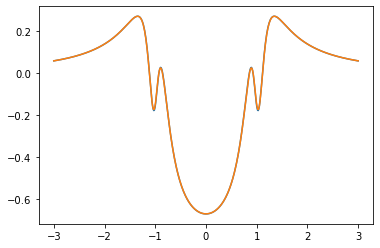

In [15]:
plt.plot(x_obs,sigma[:,0])
plt.plot(x_obs,s_11)

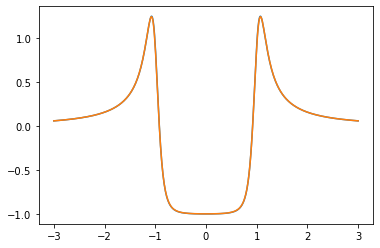

In [16]:
plt.plot(x_obs,sigma[:,1])
plt.plot(x_obs,s_22)

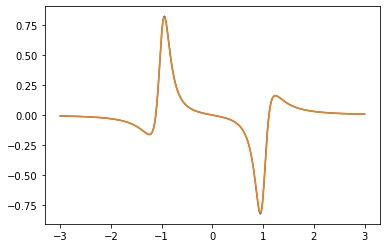

In [17]:
plt.plot(x_obs,sigma[:,2])
plt.plot(x_obs,s_12)